<a href="https://colab.research.google.com/github/AKVITA380/Deep-Learning-6-July-2024/blob/main/Regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression With Keras

In [53]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1 Read Data

In [55]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df1 = pd.read_csv(url)
df1.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Step 2 : Perform Basic Data Quality

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [57]:
df1.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [58]:
df1.duplicated().sum()

41

In [59]:
df1.duplicated().sum()/len(df)

0.004285117056856187

In [60]:
df1=df1.drop_duplicates(keep='first')
df1

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


Step 3 Separate X AND Y

In [61]:
X=df1.drop(columns=['PE'])
Y=df1[['PE']]

In [62]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [63]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Step 4 Preprocessing X using Pipeline

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [66]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')

In [67]:
X_pre= num_pipe.fit_transform(X)

In [68]:
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


Step 5 Train Test Split

In [69]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [70]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [71]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [72]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [73]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [74]:
xtest.shape

(1906, 4)

In [75]:
ytest.shape

(1906, 1)

In [76]:

xtrain.shape[1]

4

Step 6 Build the neural network

In [77]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [78]:

# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))



In [79]:

# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [80]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 6ms/step - loss: 200659.7031 - mae: 447.5608 - val_loss: 188884.7031 - val_mae: 434.0881
Epoch 2/60
239/239 [==============================] - 1s 5ms/step - loss: 157614.6094 - mae: 394.1760 - val_loss: 115361.3984 - val_mae: 334.5171
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 74952.0781 - mae: 256.5920 - val_loss: 41340.4609 - val_mae: 181.7044
Epoch 4/60
239/239 [==============================] - 1s 3ms/step - loss: 29255.9883 - mae: 148.5790 - val_loss: 20362.8789 - val_mae: 121.7235
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 17460.0332 - mae: 112.7577 - val_loss: 14148.0264 - val_mae: 101.6949
Epoch 6/60
239/239 [==============================] - 1s 3ms/step - loss: 11991.5547 - mae: 93.3253 - val_loss: 9451.9590 - val_mae: 83.1967
Epoch 7/60
239/239 [==============================] - 1s 3ms/step - loss: 7661.2139 - mae: 74.3202 - val_loss: 5805.3447 - val_mae: 64.

In [81]:
hist.history["loss"]

[200659.703125,
 157614.609375,
 74952.078125,
 29255.98828125,
 17460.033203125,
 11991.5546875,
 7661.2138671875,
 4582.60302734375,
 2726.85546875,
 1676.0030517578125,
 1054.6568603515625,
 679.1739501953125,
 456.61724853515625,
 319.9328918457031,
 230.80995178222656,
 169.14309692382812,
 126.77165985107422,
 97.8285140991211,
 77.66989135742188,
 63.501731872558594,
 53.36631774902344,
 46.11127853393555,
 40.24704360961914,
 36.0278205871582,
 32.64242172241211,
 29.690595626831055,
 27.647802352905273,
 25.914478302001953,
 24.614171981811523,
 23.637374877929688,
 22.870424270629883,
 22.275150299072266,
 22.03121566772461,
 21.611291885375977,
 21.4503231048584,
 21.39566421508789,
 21.078454971313477,
 20.953088760375977,
 20.80992317199707,
 20.826683044433594,
 20.730152130126953,
 20.58061408996582,
 20.57706069946289,
 20.67066764831543,
 20.41432762145996,
 20.37493324279785,
 20.40398597717285,
 20.350576400756836,
 20.275110244750977,
 20.29275131225586,
 20.1751289

In [82]:
hist.history["val_loss"]

[188884.703125,
 115361.3984375,
 41340.4609375,
 20362.87890625,
 14148.0263671875,
 9451.958984375,
 5805.3447265625,
 3423.848388671875,
 2059.59716796875,
 1275.70556640625,
 804.18310546875,
 523.937744140625,
 359.30865478515625,
 258.06524658203125,
 186.94956970214844,
 138.83567810058594,
 106.90824127197266,
 84.52201843261719,
 68.61978912353516,
 58.295684814453125,
 49.81278610229492,
 44.122596740722656,
 39.176734924316406,
 35.42914962768555,
 32.21237564086914,
 29.594240188598633,
 27.75827980041504,
 25.934627532958984,
 24.802452087402344,
 23.997920989990234,
 23.006223678588867,
 22.834455490112305,
 22.270000457763672,
 23.062114715576172,
 21.200056076049805,
 21.368051528930664,
 21.09298324584961,
 21.201704025268555,
 20.592491149902344,
 20.670719146728516,
 20.301084518432617,
 20.240591049194336,
 20.179433822631836,
 20.4381103515625,
 20.857290267944336,
 20.697437286376953,
 20.833599090576172,
 20.1512451171875,
 19.96335220336914,
 19.958148956298828,

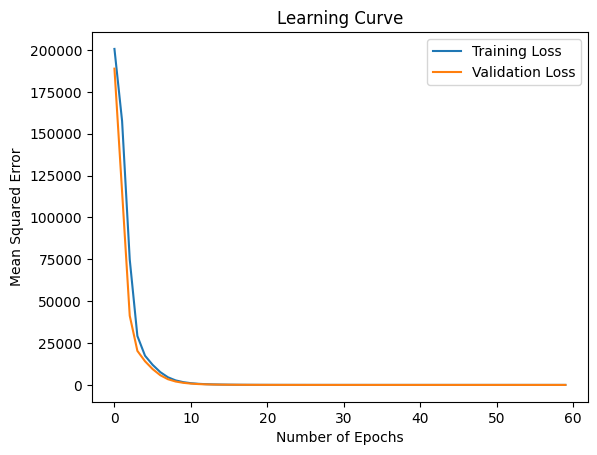

In [83]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [86]:
model.evaluate(xtrain,ytrain)

239/239 [==============================] - 0s 2ms/step - loss: 20.2141 - mae: 3.5495


[20.214126586914062, 3.54950213432312]

In [87]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 3ms/step - loss: 20.3661 - mae: 3.5812


[20.36614418029785, 3.5812084674835205]

Predict the results for train and test

In [88]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [89]:
ypred_train[0:5]

array([[450.55182],
       [476.6789 ],
       [467.03058],
       [433.62238],
       [465.25787]], dtype=float32)

In [90]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [91]:
ypred_test[0:5]

array([[432.5301 ],
       [479.88132],
       [481.43616],
       [449.491  ],
       [446.62018]], dtype=float32)

In [92]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [93]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9296716407817334

In [94]:
r2_score(ytest, ypred_test)


0.9325154473092454

Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [95]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [96]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [97]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [98]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 2ms/step


array([[444.5891 ],
       [438.71466],
       [430.23505],
       [439.3554 ],
       [472.6333 ]], dtype=float32)

In [99]:
xnew["PowerOutput_pred"] = preds

In [100]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,444.589111
1,28.88,54.89,1007.16,46.60,438.714661
2,27.89,73.21,1001.32,85.88,430.235046
3,25.69,62.26,1011.38,74.08,439.355408
4,12.16,40.81,1025.79,70.97,472.633301
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.574951
96,11.78,39.96,1011.37,82.95,470.469391
97,5.62,41.38,1020.91,86.21,482.442230
98,24.96,74.99,1008.25,80.52,436.391418


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

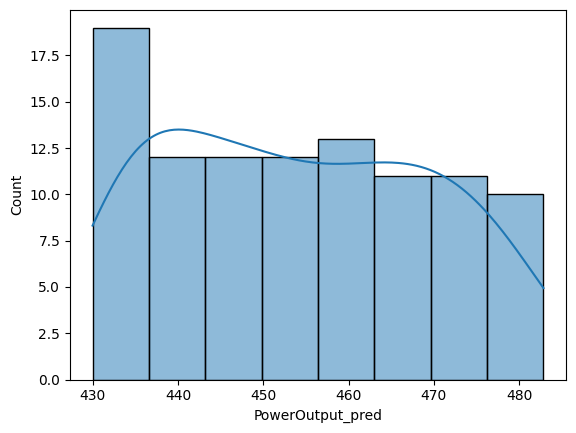

In [101]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [102]:
xnew.to_csv("Results.csv", index=False)